In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func, inspect, MetaData
from sqlalchemy.sql import select

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# Instructor provided code block to inspect the data that is contained int he sqlite file.
# create the inspector and connect to the engine
inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [27]:
# reflect an existing database into a new model
# reflect the tables
# Code structure borrowed from a python file on Github from user curiousest: https://gist.github.com/curiousest/eba63bd08cd4e538e5cd1238e4f7f97e

engine = create_engine('sqlite:///Resources/hawaii.sqlite')
Session = sessionmaker(bind=engine)
session = Session()

metadata = MetaData()
metadata.reflect(engine, only=['measurement', 'station'])
Base = automap_base(metadata=metadata)
Base.prepare()

measurement, station = Base.classes.measurement, Base.classes.station

s = select([measurement]).where(measurement.id > 1)
second_row_id = session.execute(s).scalar()

In [28]:
query = "SELECT * from measurement;"
measurement_df = pd.read_sql(query, engine)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [29]:
query = "SELECT * from station;"
station_df = pd.read_sql(query, engine)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
query = """
        SELECT 
            * 
        FROM 
            measurement
        ORDER BY
            date DESC;
        """
most_recent = pd.read_sql(query, engine)
most_recent.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

query = """
        SELECT 
            * 
        FROM 
            measurement
        WHERE
            date >= '2016-08-23'
        ORDER BY
            date ASC;
        """
one_year_df = pd.read_sql(query, engine)
one_year_df = one_year_df.set_index('date')
one_year_df

,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,5091,USC00513117,0.15,76.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,11851,USC00519523,0.02,80.0
...,...,...,...,...
2017-08-22,19549,USC00516128,0.50,76.0
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-23,7635,USC00514830,0.00,82.0


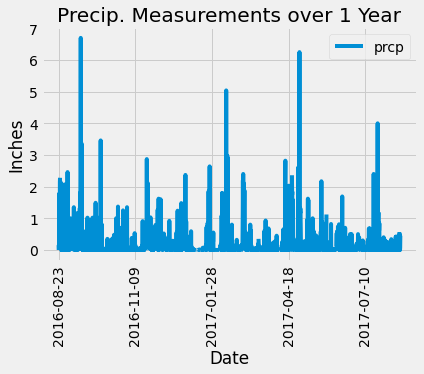

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data

one_year_df.plot(y='prcp')
plt.title("Precip. Measurements over 1 Year")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_year_df.describe()

,id,prcp,tobs
count,2230.000000,2021.000000,2230.000000
mean,10158.570404,0.177279,74.590583
std,5603.500203,0.461190,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.020000,75.000000
75%,14750.750000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset
query = """
        SELECT 
            COUNT (DISTINCT station) 
        FROM 
            measurement;
        """
engine.execute(query).fetchall()

[(9,)]

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query = """SELECT
                s.station,
                COUNT (m.id)
            FROM
                measurement m
                JOIN station s on m.station = s.station
            GROUP BY
                s.station
            ORDER BY
                COUNT (m.id) DESC;
        """

active_stations = pd.read_sql(query, engine)
active_stations

,station,COUNT (m.id)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

query = """SELECT
                *
            FROM
                measurement
            WHERE
                station = 'USC00519281';
        """

most_active = pd.read_sql(query, engine)
most_active.describe()

,id,prcp,tobs
count,2772.000000,2772.000000,2772.000000
mean,13573.500000,0.212352,71.663781
std,800.351798,0.543312,4.357642
min,12188.000000,0.000000,54.000000
25%,12880.750000,0.000000,69.000000
50%,13573.500000,0.040000,72.000000
75%,14266.250000,0.190000,74.000000
max,14959.000000,9.640000,85.000000


In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = """SELECT
                *
            FROM
                measurement
            WHERE
                station = 'USC00519281' AND date >= '2016-08-23'
            ORDER BY
                date ASC;
        """

most_active12 = pd.read_sql(query, engine)
most_active12

,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...,...
347,14955,USC00519281,2017-08-14,0.00,77.0
348,14956,USC00519281,2017-08-15,0.32,77.0
349,14957,USC00519281,2017-08-16,0.12,76.0
350,14958,USC00519281,2017-08-17,0.01,76.0


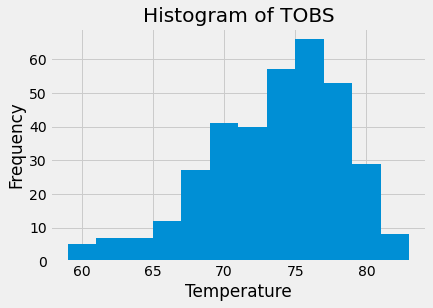

In [55]:
plt.hist(most_active12.tobs, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of TOBS")
plt.show()

# Close session

In [56]:
# Close Session
session.close()